# Taller Resolver los siguientes problemas, por el metodo de la biseccion, Punto fijo, newton, secante, etc.


Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden

EJERCICIO 1.

*Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

\begin{equation}
f(x) = e^{x} - 2 - \cos(e^x-2) 
\end{equation}

In [1]:
#librerias 
import numpy as np
from scipy import optimize
import matplotlib.pylab as plt

In [2]:
g = lambda x: np.exp(x)-2
h = lambda x: np.cos( np.exp(x)-2)
f = lambda x: g(x) - h(x)

In [3]:
x = np.linspace(-2, 2, 100)

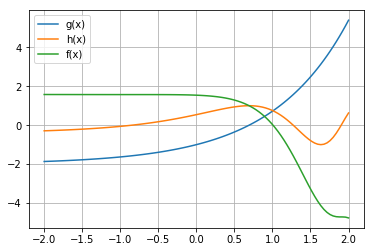

In [4]:
plt.plot(x, g(x), label="g(x)")
plt.plot(x, h(x), label="h(x)")
plt.plot(x, h(x)-g(x), label="f(x)")
plt.grid()
plt.legend()

In [5]:
#Aplicando el método de bisección a f en el intervalo [1,4]
root1= optimize.bisect(f, 1, 4)
print(root1)

1.007623971657722


In [6]:
# Metodo Newton Rapshod
#3 es la aproximación inicial a la raíz
root2 = optimize.newton(f, 3)
print(root2)


1.0076239716581368


In [7]:
root1-root2

-4.147793219999585e-13

EJERCICIO 2.

Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)

SOLUCIÓN

\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t\quad (1)
\end{equation}

Esta función se puede descomponer en dos funciones con t y w variables independientes:

\begin{equation}
h(\omega,t ) = 2\omega^2(x(t)+\sin \omega t )\quad (2)
\end{equation}


\begin{equation}
g(\omega,t ) = -g\left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right)\quad (3)
\end{equation}



Tenemos que la partícula se desplaza 0.51m en 1s, es decir X(1)=0.51.
Reemplazando estos valores en las funciones anteriores obtenemos una función que solo depende de $\omega$ .

Encontrar la rapidez $\omega$ con que $\theta$ cambia, corresponde a obtener  las raíces de la función f resultante de la suma de g y h.

In [8]:
h = lambda omega : 2*omega**2 * (0.5+np.sin(omega))
g = lambda omega : -9.76* 0.5*(np.exp(omega)-np.exp(-omega))

f = lambda omega : h(omega)-g(omega)

omega = np.linspace(-2*np.pi, 2*np.pi)


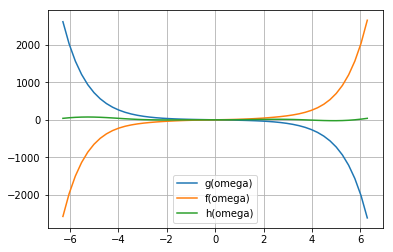

In [9]:
plt.plot(omega, g(omega), label="g(omega)")
plt.plot(omega, f(omega), label="f(omega)")
plt.plot(omega,h(omega), label="h(omega)")
plt.grid()
plt.legend()

In [10]:
root1= optimize.newton(h, 2)
print(root1)

1.4807921147405248e-08


In [11]:
#Aplicando el método de bisección a f en el intervalo [-2,2]
root2= optimize.bisect(f, -2, 2)
print(root2)

0.0


La rapidez $\omega$ con que $\theta$ cambia es un cero, por lo que se puede inferir que $\theta$  es constante

EJERCIO 3.

Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)


Esta función la podemos descomponer en dos funciones donde h,r,l son variables independientes

$$g(r,h,l)= r^2 [\frac{1}{2}\pi-arcsin\frac{h}{r}] $$

$$f(r,h,l)= h [r^2-h^2]^\frac{1}{2} + \frac{V}{l} $$

Cuando L=10pies, r=1pies, V=12.4 pies las funciones g y f son funciones que sólo dependen de h.
Encontar el h para el que estas condicones se cumplen es equivalente a encontrar las raices de la función y(h) formada por g y f

$$[\frac{1}{2}\pi-arcsin(h]+h [1-h^2]^\frac{1}{2} + 1,24=y(h)$$

In [18]:
g=lambda h:(np.arcsin(h))-(0.5*(np.pi))

f=lambda h:(h*(1-h**2)**(0.5))+1.24

y=lambda h:f(h)+g(h)



In [19]:
h=np.arange(-(np.pi)*(0.5),(np.pi)*(0.5),0.01)


Notese que el dominio de y es [-1, 1],el mismo dominio de la función arcsin, es posible encontrar valores no válidos para arcsin evaluada en las entradas del array h

/home/liceth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.
/home/liceth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


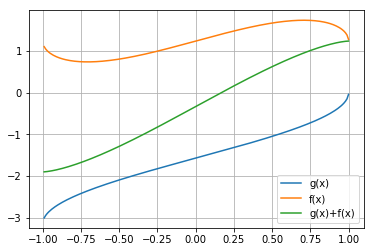

In [27]:
plt.plot(h, g(h), label="g(x)")
plt.plot(h, f(h), label="f(x)")
plt.plot(h,y(h), label="g(x)+f(x)")
plt.grid()
plt.legend()

In [13]:
root1 = optimize.newton(y,0)
print(root1)

0.16616603465836793


In [14]:
#Aplicando el método de bisección a f en el intervalo [-0.25,0.5]
root2= optimize.bisect(y,-0.25,0.5)
print(root2)

0.16616603465763546


In [31]:
#Finalmemte la profundiad del agua en pies es
profundidad=1-root2
profundidad

0.8338339653423645

EJERCICIO 4.

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 




\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden

La ecuación  \begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0\end{equation} 

puede ser escrita como de las funciones

\begin{equation}
f(\alpha) = sin(\alpha)  [B\sin(\alpha)-E]
\end{equation}

\begin{equation}
g(\alpha) = cos(\alpha)  [A\sin(\alpha)-C]
\end{equation}

Para  𝑙=89 pulg,  ℎ=49 pul,  𝐷=55 ,  𝛽=11.5 obtenemos funciones que solo dependen de $\alpha$

In [24]:
# Inicialización de variables =====================

l = 89              #desplazamiento del centro de masa en pulgadas
h = 49              #altura en pulgadas
D = 55 
b = 11.5           #beta en grados
b = b*np.pi/180   #pasando beta a radianes

# Operaciones con esas variables  ==================
#(coeficientes de la función original)

A = l*np.sin(b)
B = l*np.cos(b)
C = (h + 0.5*D)*np.sin(b) - 0.5*D*np.tan(b)
E = (h + 0.5*D)*np.cos(b) - 0.5*D


# Funciones =======================================

f = lambda a: np.sin(a) * (B*np.sin(a) - E)
g = lambda a: np.cos(a) * (A*np.sin(a) - C)
h = lambda a: f(a)+g(a)

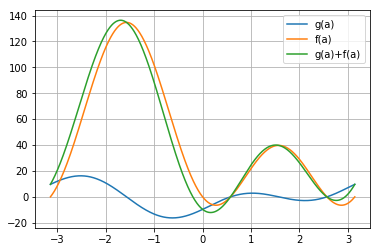

In [25]:
#Graficar las funciones

a=np.linspace(-np.pi, np.pi,1000)


plt.plot( a, g(a), label="g(a)")
plt.plot( a, f(a), label="f(a)")
plt.plot( a, h(a), label="g(a)+f(a)")
plt.grid()
plt.legend()

In [27]:
#Evaluar los ceros h usando el método de Newton
root1 = optimize.newton(h,0.5)
print(root1)

0.5754730121943985


In [22]:
optimize.fixed_point?

In [19]:
Alfa=lambda root: root*(180/(np.pi))
Alfa(root1)

32.97217482241959

El valor de $\alpha$ se aproxima a 33

Yuliana Guerrero Uchima cc.100694473